# Import Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from scipy import stats
# Load the dataset
df = pd.read_csv("C:/Users/91863/Downloads/preprocessedloandata.csv")

# Data cleaning

In [2]:
df.isnull().sum()

ListingKey                     0
ListingNumber                  0
ListingCreationDate            0
CreditGrade                    0
Term                           0
                              ..
Recommendations                0
InvestmentFromFriendsCount     0
InvestmentFromFriendsAmount    0
Investors                      0
DefaultStatus                  0
Length: 82, dtype: int64

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58848 entries, 0 to 58847
Data columns (total 82 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   ListingKey                           58848 non-null  object 
 1   ListingNumber                        58848 non-null  int64  
 2   ListingCreationDate                  58848 non-null  object 
 3   CreditGrade                          58848 non-null  int64  
 4   Term                                 58848 non-null  int64  
 5   LoanStatus                           58848 non-null  object 
 6   ClosedDate                           58848 non-null  object 
 7   BorrowerAPR                          58848 non-null  float64
 8   BorrowerRate                         58848 non-null  float64
 9   LenderYield                          58848 non-null  float64
 10  EstimatedEffectiveYield              58848 non-null  float64
 11  EstimatedLoss               

In [4]:
df.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors,DefaultStatus
0,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,0,36,Current,None,0.12016,0.0920,0.0820,...,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1,0
1,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,0,36,Current,None,0.12528,0.0974,0.0874,...,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158,0
2,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,0,36,Current,None,0.24614,0.2085,0.1985,...,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20,0
3,0F05359734824199381F61D,1074836,2013-12-14 08:26:37.093000000,0,60,Current,None,0.15425,0.1314,0.1214,...,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1,0
4,0F0A3576754255009D63151,750899,2013-04-12 09:52:56.147000000,0,36,Current,None,0.31032,0.2712,0.2612,...,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1,0


In [5]:
df.columns

Index(['ListingKey', 'ListingNumber', 'ListingCreationDate', 'CreditGrade',
       'Term', 'LoanStatus', 'ClosedDate', 'BorrowerAPR', 'BorrowerRate',
       'LenderYield', 'EstimatedEffectiveYield', 'EstimatedLoss',
       'EstimatedReturn', 'ProsperRating (numeric)', 'ProsperRating (Alpha)',
       'ProsperScore', 'ListingCategory (numeric)', 'BorrowerState',
       'Occupation', 'EmploymentStatus', 'EmploymentStatusDuration',
       'IsBorrowerHomeowner', 'CurrentlyInGroup', 'GroupKey',
       'DateCreditPulled', 'CreditScoreRangeLower', 'CreditScoreRangeUpper',
       'FirstRecordedCreditLine', 'CurrentCreditLines', 'OpenCreditLines',
       'TotalCreditLinespast7years', 'OpenRevolvingAccounts',
       'OpenRevolvingMonthlyPayment', 'InquiriesLast6Months', 'TotalInquiries',
       'CurrentDelinquencies', 'AmountDelinquent', 'DelinquenciesLast7Years',
       'PublicRecordsLast10Years', 'PublicRecordsLast12Months',
       'RevolvingCreditBalance', 'BankcardUtilization',
       'Availa

# Perform Univariate Analysis 

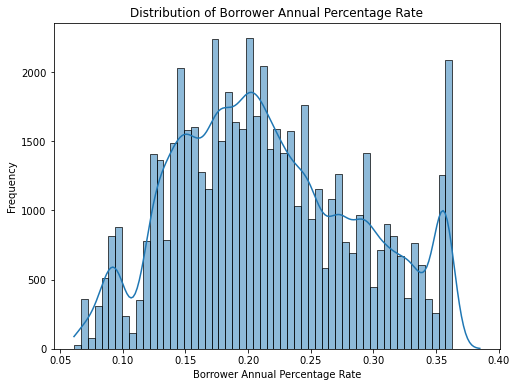

In [6]:
# Perform Univariate Analysis
# Example for numerical variable 'BorrowerAPR'
plt.figure(figsize=(8, 6))
sns.histplot(df['BorrowerAPR'], kde=True)
plt.title('Distribution of Borrower Annual Percentage Rate')
plt.xlabel('Borrower Annual Percentage Rate')
plt.ylabel('Frequency')
plt.show()

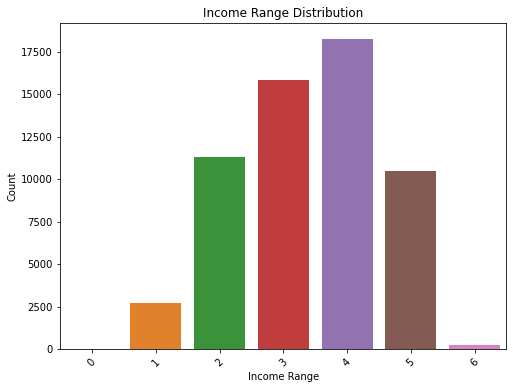

In [7]:
# Example for categorical variable 'IncomeRange'
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='IncomeRange')
plt.title('Income Range Distribution')
plt.xlabel('Income Range')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

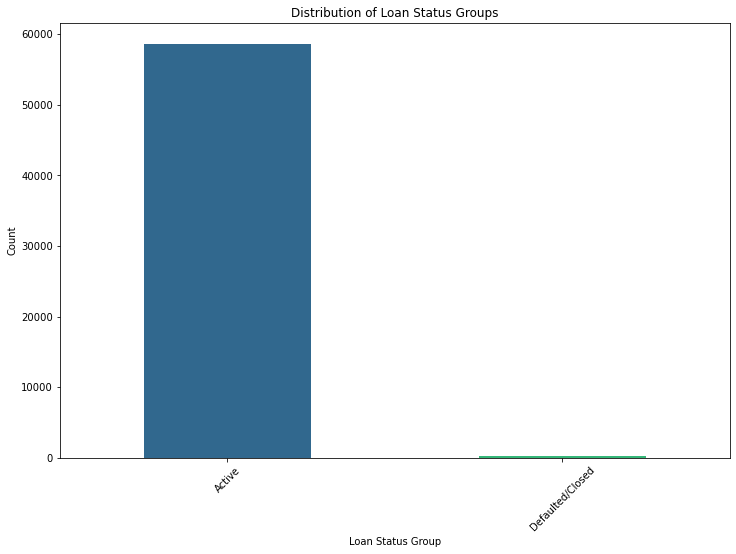

In [8]:
# Define a function to categorize loan status into groups
def categorize_loan_status(status):
    if status in ['Chargedoff', 'Defaulted', 'Cancelled', 'FinalPaymentInProgress']:
        return 'Defaulted/Closed'
    elif status in ['Completed', 'FinalPaymentInProgress']:
        return 'Completed'
    elif status in ['Current', 'Past Due (1-15 days)', 'Past Due (16-30 days)', 'Past Due (31-60 days)', 'Past Due (61-90 days)', 'Past Due (91-120 days)', 'Past Due (>120 days)', 'Grace Period']:
        return 'Active'
    else:
        return 'Other'

# Create the 'LoanStatusGroup' column by applying the categorization function to the 'LoanStatus' column
df['LoanStatusGroup'] = df['LoanStatus'].apply(categorize_loan_status)

# Calculate the count of each loan status group
loan_status_group_counts = df['LoanStatusGroup'].value_counts()

# Plotting grouped bar plot for LoanStatusGroup
plt.figure(figsize=(12, 8))
loan_status_group_counts.plot(kind='bar', color=sns.color_palette('viridis', len(loan_status_group_counts)))
plt.title('Distribution of Loan Status Groups')
plt.xlabel('Loan Status Group')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()


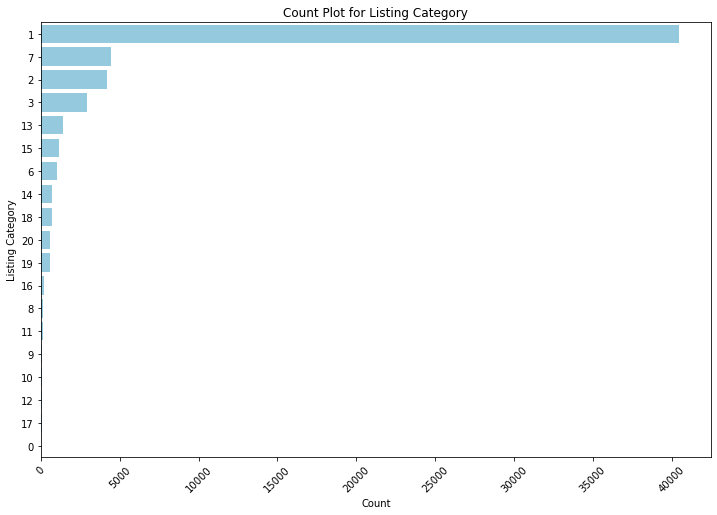

In [9]:
# Plotting count plot for ListingCategory using seaborn's countplot
plt.figure(figsize=(12, 8))
sns.countplot(data=df, y='ListingCategory (numeric)', color='skyblue', order=df['ListingCategory (numeric)'].value_counts().index)
plt.title('Count Plot for Listing Category')
plt.xlabel('Count')
plt.ylabel('Listing Category')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()


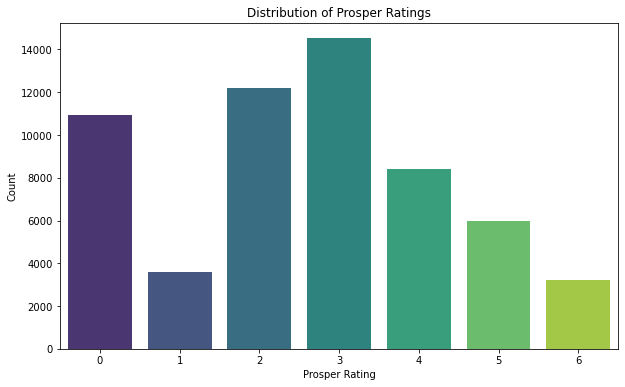

In [10]:
# Plotting count plot for ProsperRating (Alpha) using seaborn's countplot
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='ProsperRating (Alpha)', palette='viridis')
plt.title('Distribution of Prosper Ratings')
plt.xlabel('Prosper Rating')
plt.ylabel('Count')
plt.show()

# Perform Bivariate Analysis

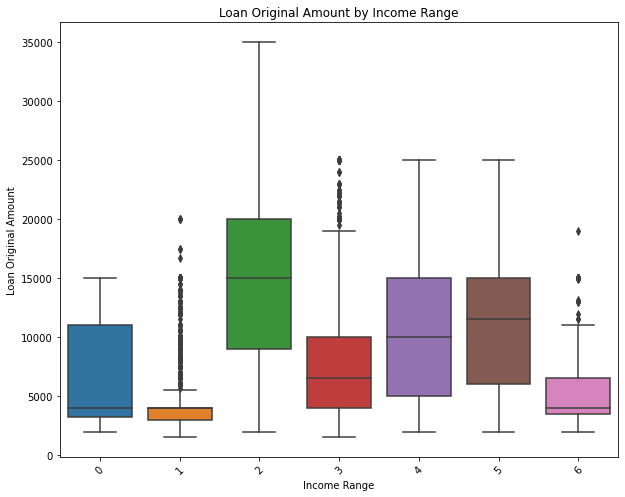

In [11]:
# Perform Bivariate Analysis
# Example: Scatter plot for 'BorrowerAPR' vs 'LoanOriginalAmount'
plt.figure(figsize=(10, 8))
sns.boxplot(data=df, x='IncomeRange', y='LoanOriginalAmount')
plt.title('Loan Original Amount by Income Range')
plt.xlabel('Income Range')
plt.ylabel('Loan Original Amount')
plt.xticks(rotation=45)
plt.show()

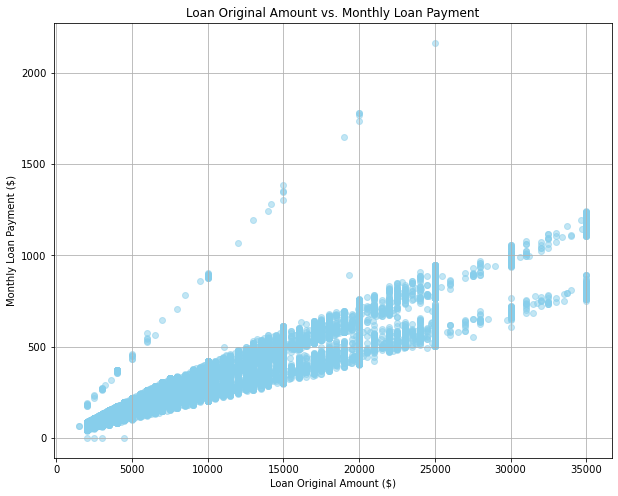

In [12]:
# Plotting scatter plot for LoanOriginalAmount vs. MonthlyLoanPayment
plt.figure(figsize=(10, 8))
plt.scatter(df['LoanOriginalAmount'], df['MonthlyLoanPayment'], alpha=0.5, color='skyblue')
plt.title('Loan Original Amount vs. Monthly Loan Payment')
plt.xlabel('Loan Original Amount ($)')
plt.ylabel('Monthly Loan Payment ($)')
plt.grid(True)
plt.show()


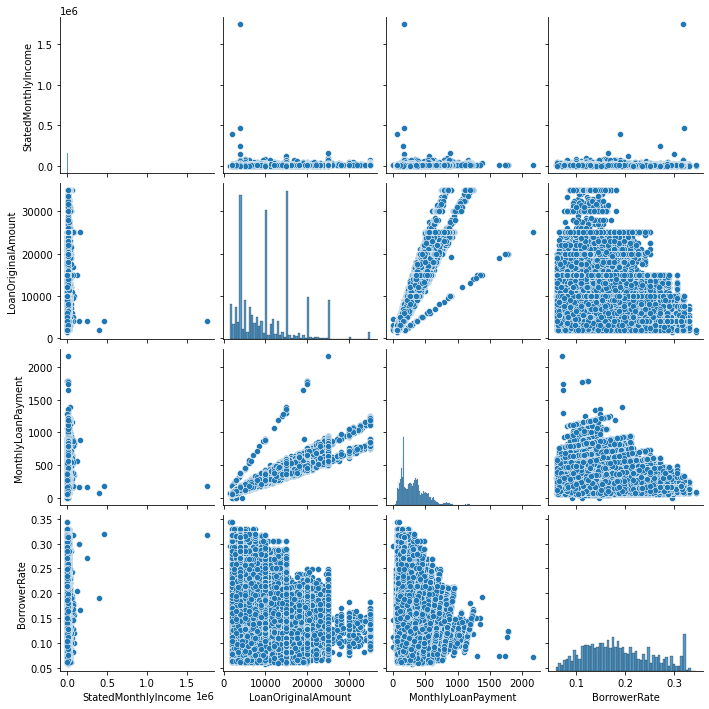

In [13]:
sns.pairplot(df[['StatedMonthlyIncome', 'LoanOriginalAmount', 'MonthlyLoanPayment', 'BorrowerRate']], diag_kind='hist', kind='scatter')
plt.show()

<Figure size 864x576 with 0 Axes>

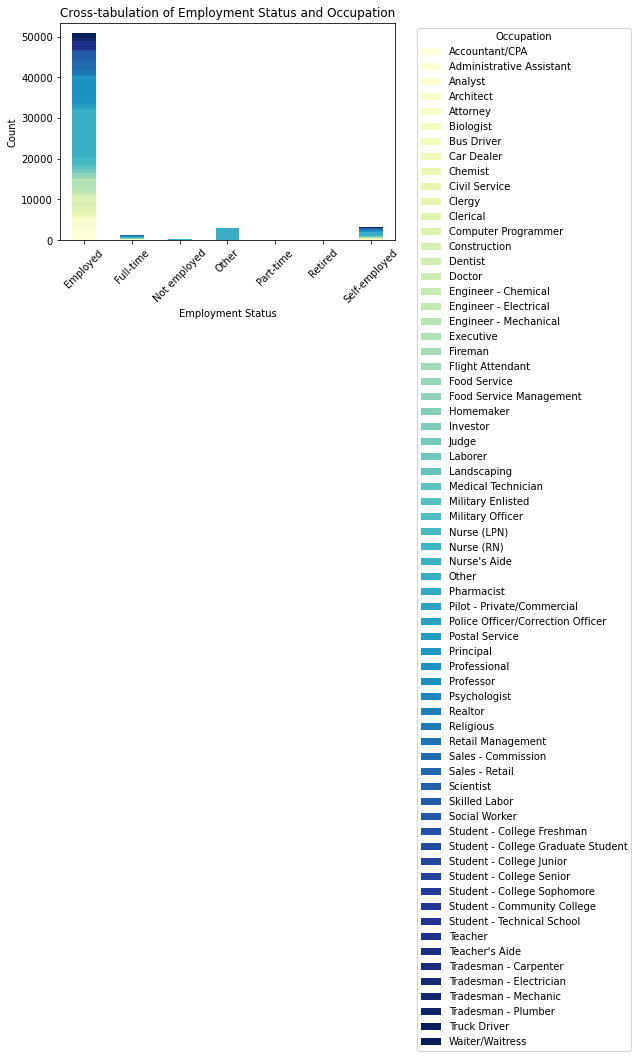

In [14]:
# Create a cross-tabulation of EmploymentStatus and Occupation
cross_tab = pd.crosstab(index=df['EmploymentStatus'], columns=df['Occupation'])

# Plotting clustered bar plot
plt.figure(figsize=(12, 8))
cross_tab.plot(kind='bar', stacked=True, cmap='YlGnBu')
plt.title('Cross-tabulation of Employment Status and Occupation')
plt.xlabel('Employment Status')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend(title='Occupation', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


In [15]:
pd.crosstab(columns=[df.LoanStatus],index=[df.IsBorrowerHomeowner],margins=True,normalize='index')

LoanStatus,Current,FinalPaymentInProgress,Past Due (1-15 days),Past Due (16-30 days),Past Due (31-60 days),Past Due (61-90 days),Past Due (91-120 days),Past Due (>120 days)
IsBorrowerHomeowner,,,,,,,,
0,0.957479,0.003485,0.015739,0.005026,0.006567,0.004916,0.006494,0.000294
1,0.964768,0.003482,0.011934,0.004052,0.005824,0.005666,0.004020,0.000253
All,0.961392,0.003484,0.013696,0.004503,0.006168,0.005319,0.005166,0.000272


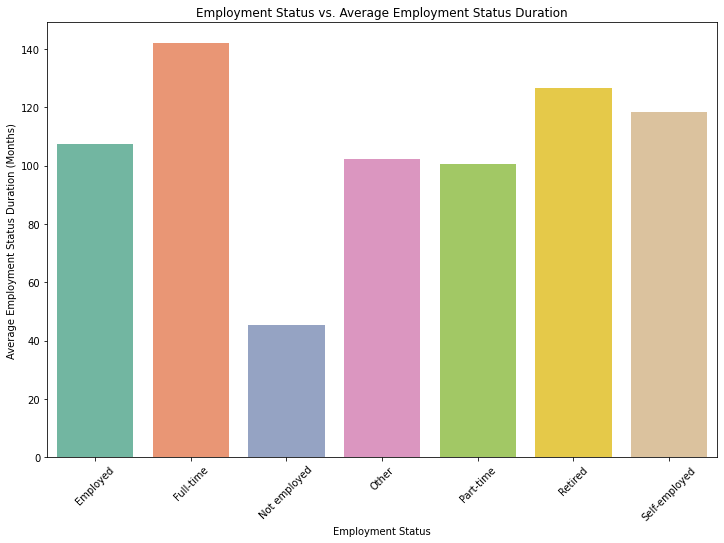

In [16]:
# Grouping the data by 'EmploymentStatus' and calculating the mean 'EmploymentStatusDuration'
grouped_data = df.groupby('EmploymentStatus')['EmploymentStatusDuration'].mean().reset_index()

# Plotting grouped bar plot for EmploymentStatus vs. EmploymentStatusDuration
plt.figure(figsize=(12, 8))
sns.barplot(data=grouped_data, x='EmploymentStatus', y='EmploymentStatusDuration', palette='Set2')
plt.title('Employment Status vs. Average Employment Status Duration')
plt.xlabel('Employment Status')
plt.ylabel('Average Employment Status Duration (Months)')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()


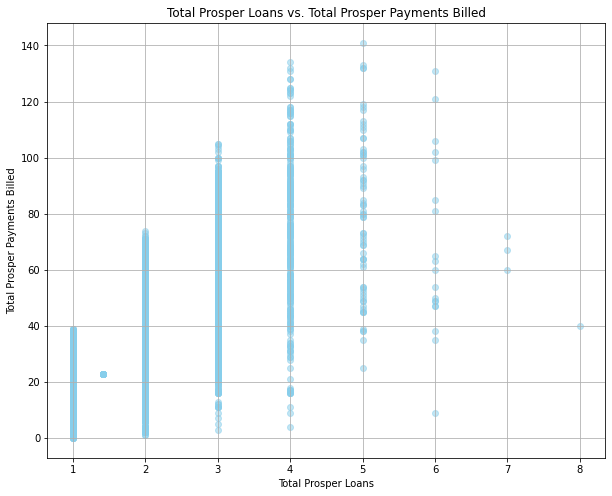

In [17]:
# Plotting scatter plot for TotalProsperLoans vs. TotalProsperPaymentsBilled
plt.figure(figsize=(10, 8))
plt.scatter(df['TotalProsperLoans'], df['TotalProsperPaymentsBilled'], alpha=0.5, color='skyblue')
plt.title('Total Prosper Loans vs. Total Prosper Payments Billed')
plt.xlabel('Total Prosper Loans')
plt.ylabel('Total Prosper Payments Billed')
plt.grid(True)
plt.show()


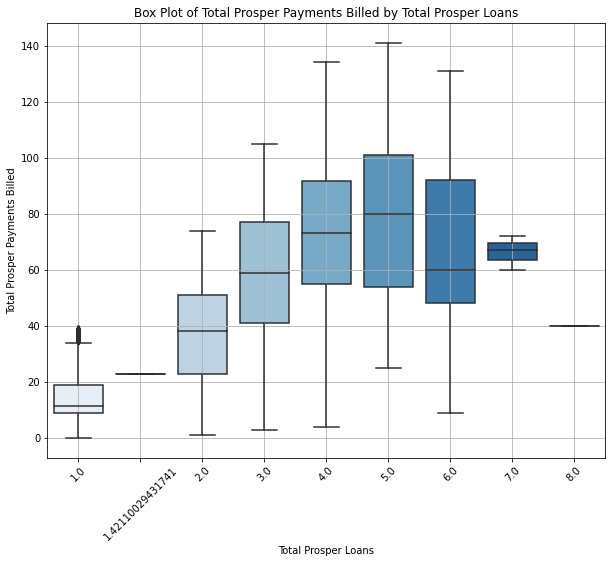

In [18]:
plt.figure(figsize=(10, 8))
sns.boxplot(data=df, x='TotalProsperLoans', y='TotalProsperPaymentsBilled', palette='Blues')
plt.title('Box Plot of Total Prosper Payments Billed by Total Prosper Loans')
plt.xlabel('Total Prosper Loans')
plt.ylabel('Total Prosper Payments Billed')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(True)
plt.show()


# Multivariate analysis 

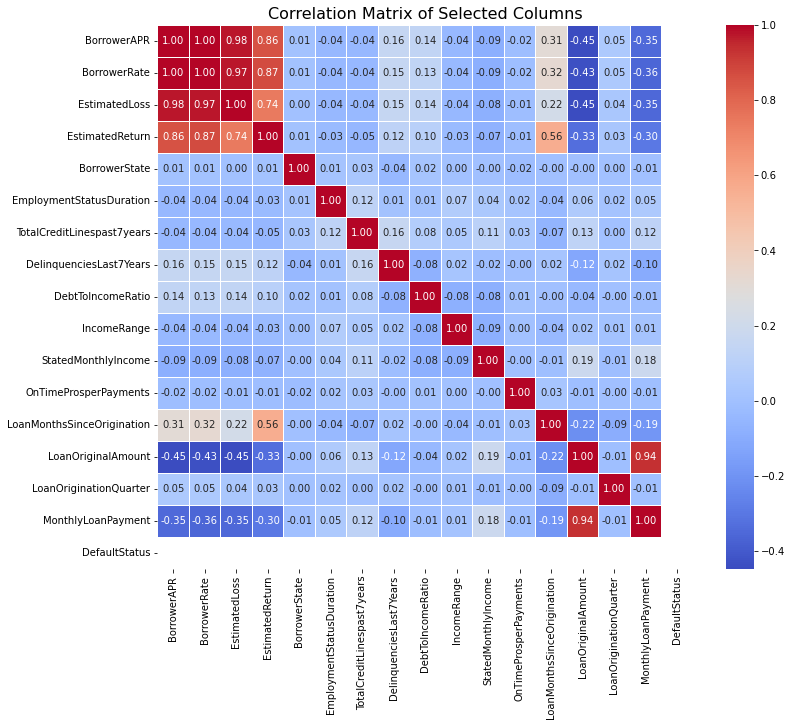

In [19]:
# Perform Multi-variate Analysis
# Select a subset of columns for the heatmap
selected_columns = ['BorrowerAPR', 'BorrowerRate','EstimatedLoss','EstimatedReturn','BorrowerState','Occupation', 
                    'EmploymentStatus', 'EmploymentStatusDuration','TotalCreditLinespast7years', 
                    'DelinquenciesLast7Years','DebtToIncomeRatio', 'IncomeRange','StatedMonthlyIncome','OnTimeProsperPayments',
                 'LoanMonthsSinceOrigination','LoanOriginalAmount','LoanOriginationQuarter','MonthlyLoanPayment','DefaultStatus']

# Compute the correlation matrix for the selected columns
corr_matrix = df[selected_columns].corr()

# Set up the matplotlib figure
plt.figure(figsize=(12, 10))

# Draw the heatmap with better formatting
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, annot_kws={"size": 10})

# Set the title and display the plot
plt.title('Correlation Matrix of Selected Columns', fontsize=16)
plt.show()


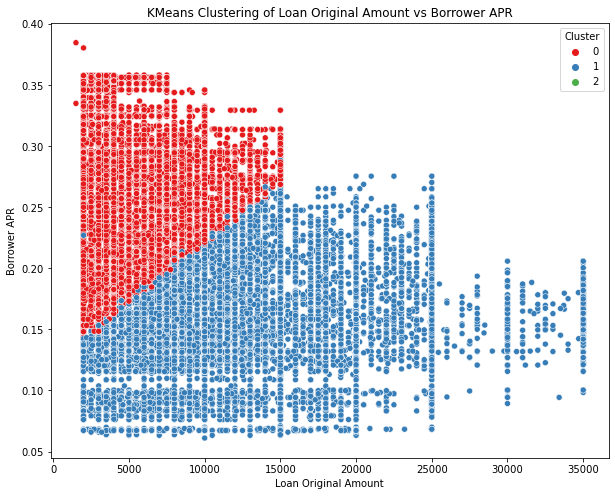

In [20]:
# Select numerical variables for cluster analysis
numerical_cols = ['BorrowerAPR', 'LoanOriginalAmount', 'StatedMonthlyIncome']

# Standardize the numerical variables
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df[numerical_cols])

# Perform KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(df_scaled)

# Plot the clusters
plt.figure(figsize=(10, 8))
sns.scatterplot(data=df, x='LoanOriginalAmount', y='BorrowerAPR', hue='Cluster', palette='Set1')
plt.title('KMeans Clustering of Loan Original Amount vs Borrower APR')
plt.xlabel('Loan Original Amount')
plt.ylabel('Borrower APR')
plt.show()


In [21]:
# Selecting relevant columns
relevant_data = df[['BorrowerAPR','LoanOriginalAmount','LP_InterestandFees']]

# Group data by 'ProsperRating (Alpha)' and calculate mean APR for each group
grouped_data = relevant_data.groupby('LoanOriginalAmount')['BorrowerAPR']

# Performing ANOVA test
f_statistic, p_value = stats.f_oneway(*[group for _, group in grouped_data])

# Print the results
print("F-Statistic:", f_statistic)
print("P-Value:", p_value)


F-Statistic: 22.97929090060812
P-Value: 0.0


In [22]:


# Select the features for dimensionality reduction
features = ['BorrowerAPR', 'LoanOriginalAmount', 'LP_InterestandFees']

# Extract the feature values
X = df[features]

# Standardize the features (mean=0, variance=1)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform PCA
pca = PCA(n_components=2)  # Specify the number of components to keep
X_pca = pca.fit_transform(X_scaled)

# Create a DataFrame for the principal components
principal_df = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])

# Concatenate the principal components with the original DataFrame if needed
final_df = pd.concat([principal_df, df], axis=1)

# Print explained variance ratio
print("Explained Variance Ratio:", pca.explained_variance_ratio_)


Explained Variance Ratio: [0.48213902 0.39456794]
